In [ ]:
import pandas as pd
from scipy.spatial import KDTree
import numpy as np

df1_path = '/content/TRAIN.txt'
#df1_path = '/content/drive/MyDrive/Master AI & Big Data/07 Machine Learning y Deep Learning/Practica Final - Vinicho/data/TRAIN.txt'
df1 = pd.read_csv(df1_path, sep='|', encoding='utf-8')

df2_path = '/content/ETO.txt'
#df2_path = '/content/drive/MyDrive/Master AI & Big Data/07 Machine Learning y Deep Learning/Practica Final - Vinicho/data/METEO.txt'
df2 = pd.read_csv(df2_path, sep='|', encoding='utf-8')

df3_path = '/content/METEO.txt'
#df3_path = '/content/drive/MyDrive/Master AI & Big Data/07 Machine Learning y Deep Learning/Practica Final - Vinicho/data/ETO.txt'
df3 = pd.read_csv(df3_path, sep='|', encoding='utf-8')

In [ ]:
import pandas as pd
import numpy as np

# Reemplazar valores 0 en SUPERFICIE con NaN
df1['SUPERFICIE'] = df1['SUPERFICIE'].replace(0, pd.NA)

# Lista de columnas clave para coincidencias exactas
columnas_clave = ['ID_FINCA', 'ID_ZONA', 'ID_ESTACION', 'ALTITUD', 'VARIEDAD', 'MODO', 'TIPO', 'COLOR']

# Identificar registros con y sin superficie
sin_superficie = df1[df1['SUPERFICIE'].isna()]
con_superficie = df1[df1['SUPERFICIE'].notna()]

# PASO 1: Asignar por coincidencias exactas en todas las columnas clave
for idx, row in sin_superficie.iterrows():
    match = con_superficie
    for col in columnas_clave:
        match = match[match[col] == row[col]]  # Filtrar coincidencias exactas

    if not match.empty:
        df1.at[idx, 'SUPERFICIE'] = match['SUPERFICIE'].mean()  # Asigna la media

# Mostrar porcentaje de NaN después del primer intento
porcentaje_nan = df1['SUPERFICIE'].isna().mean() * 100
print(f"🔹 Después de coincidencias exactas: {porcentaje_nan:.2f}% NaN")

# Actualizar registros sin superficie después del primer intento
sin_superficie = df1[df1['SUPERFICIE'].isna()]

# PASO 2: Asignar por producción similar (+/-10%) y coincidencias en ALTITUD, VARIEDAD, MODO, TIPO, COLOR
columnas_filtradas = ['ALTITUD', 'VARIEDAD', 'MODO', 'TIPO', 'COLOR']

for idx, row in sin_superficie.iterrows():
    if pd.notna(row['PRODUCCION']):  # Asegurar que PRODUCCION no sea NaN
        prod_min = row['PRODUCCION'] * 0.9
        prod_max = row['PRODUCCION'] * 1.1

        match = con_superficie[
            (con_superficie['PRODUCCION'] >= prod_min) &
            (con_superficie['PRODUCCION'] <= prod_max)
        ]

        for col in columnas_filtradas:
            match = match[match[col] == row[col]]  # Filtrar coincidencias en los atributos

        if not match.empty:
            df1.at[idx, 'SUPERFICIE'] = match['SUPERFICIE'].mean()  # Asigna la media

# Mostrar porcentaje de NaN después del segundo intento
porcentaje_nan = df1['SUPERFICIE'].isna().mean() * 100
print(f"🔹 Después de producción similar y coincidencia en atributos: {porcentaje_nan:.2f}% NaN")

# PASO 3: Asignar por ID_FINCA
superficie_por_finca = df1.groupby('ID_FINCA')['SUPERFICIE'].first()
df1['SUPERFICIE'] = df1['ID_FINCA'].map(superficie_por_finca)

# Mostrar porcentaje de NaN después del tercer intento
porcentaje_nan = df1['SUPERFICIE'].isna().mean() * 100
print(f"🔹 Después de asignar por ID_FINCA: {porcentaje_nan:.2f}% NaN")

# PASO 4: Asignar por ID_ZONA con la mediana
df1['SUPERFICIE'] = pd.to_numeric(df1['SUPERFICIE'], errors='coerce')  # Convierte a numérico
df1['SUPERFICIE'] = df1.groupby('ID_ZONA')['SUPERFICIE'].transform(lambda x: x.fillna(x.median()))

# Mostrar porcentaje de NaN después del cuarto intento
porcentaje_nan = df1['SUPERFICIE'].isna().mean() * 100
print(f"🔹 Después de asignar por ID_ZONA (mediana): {porcentaje_nan:.2f}% NaN")

df1 = df1.dropna(subset=['SUPERFICIE'])

df1.to_csv('df1_clean.csv', index=False)
# Calcular el porcentaje de NaN final (debe ser 0%)
porcentaje_nan = df1['SUPERFICIE'].isna().mean() * 100
print(f"✅ El porcentaje final de valores NaN en SUPERFICIE es: {porcentaje_nan:.2f}%")


🔹 Después de coincidencias exactas: 22.77% NaN
🔹 Después de producción similar y coincidencia en atributos: 19.74% NaN
🔹 Después de asignar por ID_FINCA: 8.41% NaN
🔹 Después de asignar por ID_ZONA (mediana): 0.79% NaN
✅ El porcentaje final de valores NaN en SUPERFICIE es: 0.00%


In [ ]:
# Aplicar transformación logarítmica a SUPERFICIE y PRODUCCION
df1["SUPERFICIE"] = np.log1p(df1["SUPERFICIE"])  # log(1 + x) para evitar log(0)
df1["PRODUCCION"] = np.log1p(df1["PRODUCCION"])  # log(1 + x)

      ID_FINCA  SUPERFICIE  PRODUCCION
3970       200    0.314811    6.721435
1819       200    0.314811    6.658145
5037       200    0.314811    6.410524
6109       200    0.314811    5.975559
671        200    0.314811    7.550135
7133       200    0.314811    6.303351
2915       200    0.314811    7.400743
8187       439    0.732368         NaN
1869       439    0.732368    8.073839
2964       439    0.732368    8.757060
724        439    0.732368    7.703549
1855       447    0.384854    8.084287
7158       447    0.384854    7.947869
2950       447    0.384854    7.415281
710        447    0.384854    7.509719
8176       447    0.384854         NaN
2949       447    0.384854    6.762854
4002       447    0.384854    7.198921
5652       523    0.499441    7.112184
6708       523    0.499441    6.855244
3565       523    0.499441    8.224967
4593       523    0.499441    7.950529
7720       523    0.499441         NaN
226        523    0.499441    7.736918
322        528    1.03953

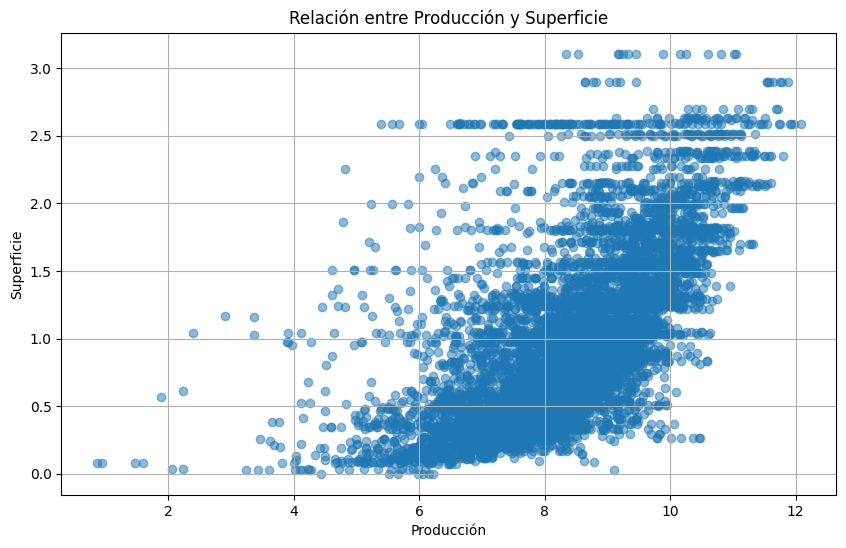

In [ ]:
import matplotlib.pyplot as plt

# Mostrar una tabla con los valores
tabla_muestra = df1[['ID_FINCA', 'SUPERFICIE', 'PRODUCCION']].sort_values(by='ID_FINCA').head(50)  # Muestra los primeros 50 registros
print(tabla_muestra)

# Visualizar gráficamente la relación entre PRODUCCION y SUPERFICIE
plt.figure(figsize=(10, 6))
plt.scatter(df1['PRODUCCION'], df1['SUPERFICIE'], alpha=0.5)
plt.xlabel('Producción')
plt.ylabel('Superficie')
plt.title('Relación entre Producción y Superficie')
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import numpy as np


def calcular_altitud_media(valor):
  """Calcula la media del intervalo si el valor tiene el formato "600-630",
  de lo contrario, devuelve el valor original.
  """
  if '-' in str(valor):
    minimo, maximo = map(int, valor.split('-'))
    return (minimo + maximo) / 2
  else:
    return float(valor)

# Aplicar la función a la columna "altitud"
df1['ALTITUD'] = df1['ALTITUD'].apply(calcular_altitud_media)

In [ ]:
# Calculate quartiles
Q1 = df1['ALTITUD'].quantile(0.25)
Q3 = df1['ALTITUD'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Find outliers
outliers = df1[(df1['ALTITUD'] > upper_bound) | (df1['ALTITUD'] < lower_bound)]

# Print results
print(f"Número de outliers: {len(outliers)}")
print("\nOutliers:")
print(outliers)

Número de outliers: 0

Outliers:
Empty DataFrame
Columns: [CAMPAÑA, ID_FINCA, ID_ZONA, ID_ESTACION, ALTITUD, VARIEDAD, MODO, TIPO, COLOR, SUPERFICIE, PRODUCCION]
Index: []


In [ ]:
# Calculate mean
media_altitud = df1['ALTITUD'].mean()

# Calculate median
mediana_altitud = df1['ALTITUD'].median()

print(f"Media de ALTITUD: {media_altitud}")
print(f"Mediana de ALTITUD: {mediana_altitud}")

Media de ALTITUD: 577.3191842542092
Mediana de ALTITUD: 610.0


In [ ]:
# Count the number of missing values before imputation
num_missing_before = df1['ALTITUD'].isnull().sum()

# Impute missing values with the mean
df1['ALTITUD'] = df1['ALTITUD'].fillna(media_altitud)

# Count the number of missing values after imputation
num_missing_after = df1['ALTITUD'].isnull().sum()

# Calculate the number of imputed records
num_imputed = num_missing_before - num_missing_after

print(f"Número de registros imputados en ALTITUD: {num_imputed}")

Número de registros imputados en ALTITUD: 25


In [ ]:
#Cálculo del número de valores faltantes por fila
missing_values_filas = df2.isnull().sum(axis=1)
print('\nValores faltantes por fila:')
print(missing_values_filas.head())

#Cálculo del porcentaje de valores faltantes por fila
missing_percentage_filas = df2.isnull().mean(axis=1) * 100
print('\nPorcentaje de valores faltantes por fila:')
print(missing_percentage_filas.head())  # Mostramos solo las primeras filas


Valores faltantes por fila:
0    111
1     75
2     84
3     72
4     81
dtype: int64

Porcentaje de valores faltantes por fila:
0    40.363636
1    27.272727
2    30.545455
3    26.181818
4    29.454545
dtype: float64


In [ ]:
original_size = df1.shape[1]

# Calcular valores faltantes y porcentaje por columna
missing_values_columnas = df1.isnull().sum()
missing_percentage_columnas = (missing_values_columnas / len(df1)) * 100

# Crear un DataFrame con los valores para columnas
missing_data_columnas = pd.DataFrame({
    'Valores Faltantes': missing_values_columnas,
    'Porcentaje Faltante (%)': missing_percentage_columnas
})

# Filtrar y eliminar las columnas con más del 30% de valores faltantes
df1 = df1.loc[:, missing_percentage_columnas <= 30]  # Usar loc para seleccionar columnas

# Mostrar el número de columnas eliminadas
num_columnas_eliminadas = original_size - df1.shape[1]  # Cambiar a shape[1]
print(f"\nSe han eliminado {num_columnas_eliminadas} columnas con más del 30% de valores faltantes.")

# Mostrar el DataFrame limpio
print(df1.head())


Se han eliminado 0 columnas con más del 30% de valores faltantes.
    CAMPAÑA  ID_FINCA  ID_ZONA  ID_ESTACION  ALTITUD  VARIEDAD  MODO  TIPO  \
12       14      5696      919           14    655.0        59     1     0   
13       14     98814      919           14    655.0        32     2     0   
14       14     98814      919           14    655.0        40     2     0   
15       14      4024      919           14    655.0        32     2     0   
16       14      4024      919           14    655.0        87     2     0   

    COLOR  SUPERFICIE  PRODUCCION  
12      1    2.154085    9.994635  
13      1    2.099942   10.357663  
14      1    2.099942    9.740439  
15      1    2.511224   10.913176  
16      0    2.511224    9.506065  


In [ ]:
original_size = df1.shape[0]


#Crear un DataFrame con ambos valores
missing_data_filas = pd.DataFrame({
    'Valores Faltantes': missing_values_filas,
    'Porcentaje Faltante (%)': missing_percentage_filas
})

#Filtrar y eliminar las filas con más del 50% de valores faltantes
df1 = df1[missing_percentage_filas <= 50]

#Mostrar el número de filas eliminadas
num_filas_eliminadas = original_size - df1.shape[0]
print(f"\nSe han eliminado {num_filas_eliminadas} filas con más del 50% de valores faltantes.")

#Mostrar el DataFrame limpio
print(df1.head())


Se han eliminado 0 filas con más del 50% de valores faltantes.
    CAMPAÑA  ID_FINCA  ID_ZONA  ID_ESTACION  ALTITUD  VARIEDAD  MODO  TIPO  \
12       14      5696      919           14    655.0        59     1     0   
13       14     98814      919           14    655.0        32     2     0   
14       14     98814      919           14    655.0        40     2     0   
15       14      4024      919           14    655.0        32     2     0   
16       14      4024      919           14    655.0        87     2     0   

    COLOR  SUPERFICIE  PRODUCCION  
12      1    2.154085    9.994635  
13      1    2.099942   10.357663  
14      1    2.099942    9.740439  
15      1    2.511224   10.913176  
16      0    2.511224    9.506065  


<ipython-input-30-0c6bef1a8b4b>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df1[missing_percentage_filas <= 50]


In [ ]:
zeros_per_column = (df1 == 0).sum()

# Print the results
print(zeros_per_column)

CAMPAÑA           0
ID_FINCA          0
ID_ZONA           0
ID_ESTACION       1
ALTITUD           0
VARIEDAD          0
MODO              0
TIPO           8365
COLOR          1291
SUPERFICIE        0
PRODUCCION        0
dtype: int64


In [ ]:
# Crear df1_clean con las filas diferentes a 21 en CAMAÑA
df1_clean = df1[df1['CAMPAÑA'] == 21]

# Eliminar las filas con CAMAÑA igual a 21 de df1
df1 = df1[df1['CAMPAÑA'] != 21]


print(f"df1 tiene {df1.shape[0]} filas.")
print(f"df1_clean tiene {df1_clean.shape[0]} filas.")

df1 tiene 7415 filas.
df1_clean tiene 1044 filas.


In [ ]:
import pandas as pd
import numpy as np

# Formato de fecha adecuado
df2['date'] = pd.to_datetime(df2['date'], format='%Y%m%d')

def obtener_estacion(fecha):
    mes = fecha.month
    if mes in [12, 1, 2]:
        return 'Winter'
    elif mes in [3, 4, 5]:
        return 'Spring'
    elif mes in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Asignar estaciones
df2['season'] = df2['date'].apply(obtener_estacion)

# Variables de interés
vars_df2 = ['DewpointLocalDayAvg', 'FeelsLikeLocalDayAvg', 'PrecipAmountLocalDayAvg', 'RelativeHumidityLocalDayAvg', 'SnowAmountLocalDayAvg', 'TemperatureLocalDayAvg', 'UVIndexLocalDayAvg', 'VisibilityLocalDayAvg', 'WindSpeedLocalDayAvg']

# Agrupar y calcular medias estacionales para df2
df2_seasonal = df2.groupby(['ID_ESTACION', 'season'])[vars_df2].mean().reset_index()
df2_seasonal = df2_seasonal.pivot(index='ID_ESTACION', columns='season').reset_index()
df2_seasonal.columns = ['ID_ESTACION'] + [f'{col[0]}_{col[1]}' for col in df2_seasonal.columns[1:]]

df1['ID_ESTACION'] = pd.to_numeric(df1['ID_ESTACION'], errors='coerce')
df1['ID_ESTACION'] = df1['ID_ESTACION'].fillna(0).astype(int)
df1['ID_ESTACION'] = df1['ID_ESTACION'].astype(int)  # Convert to int if necessary
df2_seasonal['ID_ESTACION'] = df2_seasonal['ID_ESTACION'].astype(int)

# Unir con el dataset principal
df_final = df1.merge(df2_seasonal, on='ID_ESTACION', how='left')
# df_final = df_final.merge(df3_seasonal, on='ID_ESTACION', how='left')

# Resultado
print(df_final.head())
df_final.to_csv('df_final.csv', index=False)


   CAMPAÑA  ID_FINCA  ID_ZONA  ID_ESTACION  ALTITUD  VARIEDAD  MODO  TIPO  \
0       14      5696      919           14    655.0        59     1     0   
1       14     98814      919           14    655.0        32     2     0   
2       14     98814      919           14    655.0        40     2     0   
3       14      4024      919           14    655.0        32     2     0   
4       14      4024      919           14    655.0        87     2     0   

   COLOR  SUPERFICIE  ...  UVIndexLocalDayAvg_Summer  \
0      1    2.154085  ...                   2.352708   
1      1    2.099942  ...                   2.352708   
2      1    2.099942  ...                   2.352708   
3      1    2.511224  ...                   2.352708   
4      0    2.511224  ...                   2.352708   

   UVIndexLocalDayAvg_Winter  VisibilityLocalDayAvg_Autumn  \
0                   0.459225                  12841.188645   
1                   0.459225                  12841.188645   
2             

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Columnas de identificación a preservar
columnas_id = ['ID_ESTACION', 'ID_FINCA', 'ID_ZONA', 'CAMPAÑA', 'TIPO', 'VARIEDAD', 'COLOR', 'MODO']

# Umbral para considerar columnas con muchos ceros/nulos
umbral_faltantes = 0.4

# Columnas a evaluar (excluyendo IDs)
columnas_a_evaluar = [col for col in df_final.columns if col not in columnas_id]

# Identificar columnas con muchos ceros (solo numéricas)
cols_muchos_ceros = [col for col in columnas_a_evaluar
                     if df_final[col].dtype in [np.float64, np.int64] and
                     (df_final[col] == 0).sum() / len(df_final) > umbral_faltantes]

# Identificar columnas con muchos nulos
cols_muchos_nulos = [col for col in columnas_a_evaluar
                     if df_final[col].isnull().sum() / len(df_final) > umbral_faltantes]

# Eliminar columnas con demasiados ceros o nulos
cols_a_eliminar = list(set(cols_muchos_ceros + cols_muchos_nulos))
df_final.drop(columns=cols_a_eliminar, inplace=True)
print(f"Columnas eliminadas por muchos ceros/nulos: {cols_a_eliminar}")

# Volver a identificar columnas a evaluar (excluyendo IDs)
columnas_a_evaluar = [col for col in df_final.columns if col not in columnas_id]

# Separar por tipo
num_cols = [col for col in columnas_a_evaluar if df_final[col].dtype in [np.float64, np.int64]]
cat_cols = [col for col in columnas_a_evaluar if df_final[col].dtype == 'object']

# Imputación categórica: moda por grupo de 'ID_ZONA' si está disponible
if 'ID_ZONA' in df_final.columns:
    for col in cat_cols:
        if df_final[col].isnull().sum() > 0:
            df_final[col] = df_final.groupby('ID_ZONA')[col].transform(
                lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else 'Desconocido'
            )
else:
    for col in cat_cols:
        if df_final[col].isnull().sum() > 0:
            df_final[col].fillna(df_final[col].mode()[0], inplace=True)

# Imputación numérica avanzada con KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)
df_final[num_cols] = imputer_knn.fit_transform(df_final[num_cols])

# Eliminar duplicados
df_final.drop_duplicates(inplace=True)

# Confirmar limpieza
print("Datos después de la limpieza:")
print(df_final.info())

# Guardar el dataset limpio
df_final.to_csv('df_final_limpio.csv', index=False)

Columnas eliminadas por muchos ceros/nulos: ['SnowAmountLocalDayAvg_Autumn', 'SnowAmountLocalDayAvg_Spring', 'SnowAmountLocalDayAvg_Summer']
Datos después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7415 entries, 0 to 7414
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CAMPAÑA                             7415 non-null   int64  
 1   ID_FINCA                            7415 non-null   int64  
 2   ID_ZONA                             7415 non-null   int64  
 3   ID_ESTACION                         7415 non-null   int64  
 4   ALTITUD                             7415 non-null   float64
 5   VARIEDAD                            7415 non-null   int64  
 6   MODO                                7415 non-null   int64  
 7   TIPO                                7415 non-null   int64  
 8   COLOR                               7415 non-null   int64  
 9   SU

In [ ]:
# Si no tienes instalada la librería:
!pip install category_encoders

In [ ]:
# !pip install numpy

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 85.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install numpy==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 85.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from scipy.stats import randint, uniform
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge

# Cargar dataset limpio
df = pd.read_csv('df_final_limpio.csv')

columns_to_keep = ['ID_FINCA', 'ID_ZONA', 'ID_ESTACION', 'ALTITUD', 'SUPERFICIE', 'CAMPAÑA', 'TIPO', 'VARIEDAD',
                   'COLOR', 'MODO', 'PRODUCCION', 'UVIndexLocalDayAvg_Autumn','UVIndexLocalDayAvg_Spring','UVIndexLocalDayAvg_Summer',
                   'UVIndexLocalDayAvg_Winter','VisibilityLocalDayAvg_Autumn','VisibilityLocalDayAvg_Spring',
                   'VisibilityLocalDayAvg_Summer', 'TemperatureLocalDayAvg_Autumn','TemperatureLocalDayAvg_Spring',
                   'TemperatureLocalDayAvg_Summer', 'TemperatureLocalDayAvg_Winter']
df = df[columns_to_keep]

# Identificar tipos de variables
num_features = ['ALTITUD', 'SUPERFICIE',
                'UVIndexLocalDayAvg_Autumn','UVIndexLocalDayAvg_Spring','UVIndexLocalDayAvg_Summer',
                'UVIndexLocalDayAvg_Winter','VisibilityLocalDayAvg_Autumn','VisibilityLocalDayAvg_Spring',
                'VisibilityLocalDayAvg_Summer', 'TemperatureLocalDayAvg_Autumn','TemperatureLocalDayAvg_Spring',
                'TemperatureLocalDayAvg_Summer', 'TemperatureLocalDayAvg_Winter']

cat_features_ohe = ['MODO', 'TIPO', 'COLOR']
cat_features_target = ['VARIEDAD']
target = 'PRODUCCION'

# Variables predictoras y objetivo
X = df.drop(columns=[target], errors='ignore')
y = df[target]

X_train = X[df['CAMPAÑA'] != 19]
y_train = y[df['CAMPAÑA'] != 19]

X_test = X[df['CAMPAÑA'] == 19]
y_test = y[df['CAMPAÑA'] == 19]

# Pipeline de preprocesamiento actualizado
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), num_features),  # Cambiado a MinMaxScaler
    ('ohe', OneHotEncoder(drop='first'), cat_features_ohe),
    ('target', TargetEncoder(), cat_features_target)
])

# Modelos base
modelos_base = {
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(silent=True, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'ExtraTrees': ExtraTreesRegressor(random_state=42),
}

# Hiperparámetros para RandomizedSearchCV
param_grid = {
    'XGBoost': {
        'model__n_estimators': randint(100, 1000),
        'model__learning_rate': uniform(0.01, 0.2),
        'model__max_depth': randint(3, 15),
        'model__subsample': uniform(0.5, 0.5),
        'model__colsample_bytree': uniform(0.5, 0.5),
        'model__gamma': uniform(0, 5),
        'model__reg_alpha': uniform(0, 2),
        'model__reg_lambda': uniform(0, 2)
    },
    'RandomForest': {
        'model__n_estimators': randint(100, 1000),
        'model__max_depth': randint(3, 20),
        'model__min_samples_split': randint(2, 15),
        'model__min_samples_leaf': randint(1, 10),
        'model__max_features': ['auto', 'sqrt', 'log2', None]
    },
    'LightGBM': {
        'model__n_estimators': randint(100, 1000),
        'model__learning_rate': uniform(0.01, 0.2),
        'model__num_leaves': randint(20, 100),
        'model__feature_fraction': uniform(0.5, 0.5),
        'model__bagging_fraction': uniform(0.5, 0.5),
        'model__min_child_samples': randint(10, 100),
        'model__reg_alpha': uniform(0, 2),
        'model__reg_lambda': uniform(0, 2)
    },
    'CatBoost': {
        'model__iterations': randint(100, 1000),
        'model__learning_rate': uniform(0.01, 0.2),
        'model__depth': randint(3, 15),
        'model__l2_leaf_reg': uniform(1, 10),
        'model__random_strength': uniform(0.5, 2),
        'model__bagging_temperature': uniform(0, 1),
        'model__leaf_estimation_iterations': randint(1, 10)
    },
        'GradientBoosting': {
        'model__n_estimators': randint(100, 1000),
        'model__learning_rate': uniform(0.01, 0.2),
        'model__max_depth': randint(3, 15),
        'model__min_samples_split': randint(2, 20),
        'model__min_samples_leaf': randint(1, 10),
        'model__subsample': uniform(0.5, 0.5)
    },
        'ExtraTrees': {
        'model__n_estimators': randint(100, 1000),
        'model__max_depth': randint(3, 20),
        'model__min_samples_split': randint(2, 15),
        'model__min_samples_leaf': randint(1, 10),
        'model__max_features': ['auto', 'sqrt', 'log2', None]
    }
}

# Evaluación cruzada con K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mejores_modelos = {}

# Entrenamiento de modelos base con RandomizedSearchCV
for nombre, modelo in modelos_base.items():
    print(f"Optimizando {nombre}...")

    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('model', modelo)
    ])

    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grid[nombre],
        n_iter=20,
        cv=kf,
        scoring='neg_mean_squared_error',
        verbose=2,
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train, y_train)
    mejores_modelos[nombre] = random_search.best_estimator_
    print(f"Mejores hiperparámetros para {nombre}: {random_search.best_params_}")


Optimizando XGBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros para XGBoost: {'model__colsample_bytree': 0.9010984903770198, 'model__gamma': 0.3727532183988541, 'model__learning_rate': 0.20737738732010347, 'model__max_depth': 10, 'model__n_estimators': 228, 'model__reg_alpha': 0.3974313630683448, 'model__reg_lambda': 0.011044234247204798, 'model__subsample': 0.9077307142274171}
Optimizando RandomForest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **la

Mejores hiperparámetros para RandomForest: {'model__max_depth': 13, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__min_samples_split': 9, 'model__n_estimators': 774}
Optimizando LightGBM...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=0.6293899908000085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6293899908000085
[LightGBM] [Warning] bagging_fraction is set=0.954660201039391, subsample=1.0 will be ignored. Current value: bagging_fraction=0.954660201039391
[LightGBM] [Warning] feature_fraction is set=0.6293899908000085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6293899908000085
[LightGBM] [Warning] bagging_fraction is set=0.954660201039391, subsample=1.0 will be ignored. Current value: bagging_fraction=0.954660201039391
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001848 seconds.
You can set `force_col_w

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores hiperparámetros para CatBoost: {'model__bagging_temperature': 0.007066305219717406, 'model__depth': 11, 'model__iterations': 660, 'model__l2_leaf_reg': 6.2477466025838915, 'model__leaf_estimation_iterations': 3, 'model__learning_rate': 0.08649239825343255, 'model__random_strength': 2.4664617716135764}
Optimizando GradientBoosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros para GradientBoosting: {'model__learning_rate': 0.021616722433639893, 'model__max_depth': 10, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 971, 'model__subsample': 0.8540362888980227}
Optimizando ExtraTrees...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

Mejores hiperparámetros para ExtraTrees: {'model__max_depth': 11, 'model__max_features': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 13, 'model__n_estimators': 747}


WeightedEnsemble_L2 - RMSE: 0.55, R²: 0.81


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.6293899908000085, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6293899908000085
[LightGBM] [Warning] bagging_fraction is set=0.954660201039391, subsample=1.0 will be ignored. Current value: bagging_fraction=0.954660201039391


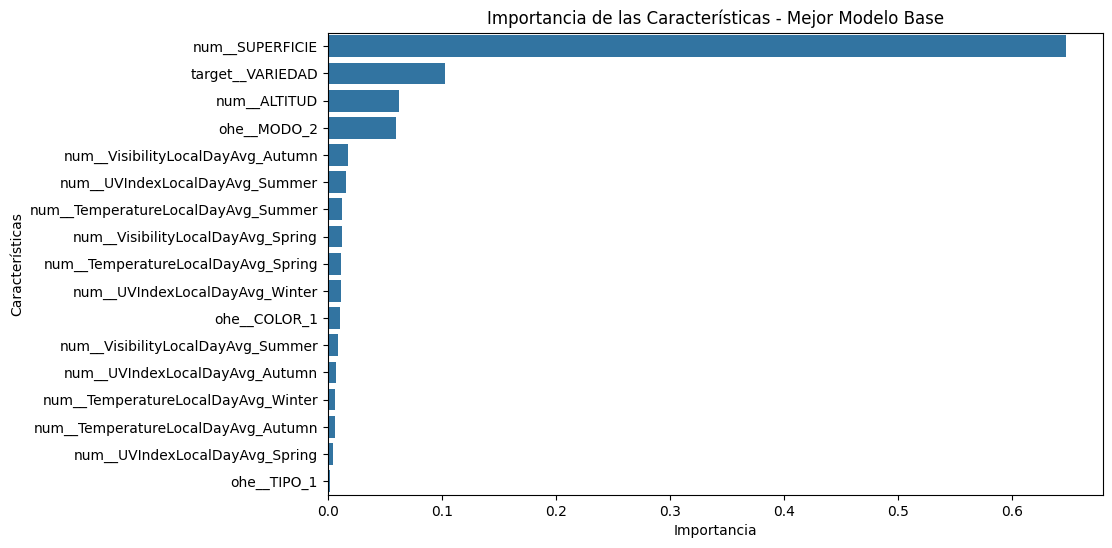

In [ ]:
# Crear el WeightedEnsemble_L2 (Stacking Regressor)

estimadores_stacking = [(nombre, modelo) for nombre, modelo in modelos_base.items()]

ensemble = StackingRegressor(
    estimators=estimadores_stacking,
    final_estimator=XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, n_jobs=-1),
    cv=kf,
    n_jobs=-1
)

# Entrenamiento y evaluación del ensemble
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"WeightedEnsemble_L2 - RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Importancia de características del mejor modelo base
mejor_modelo = max(mejores_modelos.items(), key=lambda x: r2_score(y, x[1].predict(X)))[1]
importancias = pd.Series(
    mejor_modelo.named_steps['model'].feature_importances_,
    index=mejor_modelo.named_steps['preprocessing'].get_feature_names_out()
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importancias, y=importancias.index)
plt.title("Importancia de las Características - Mejor Modelo Base")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

In [ ]:
import joblib

# Guardar el modelo ensemble
joblib.dump(ensemble, 'modelo_ensemble.pkl')

In [ ]:
# Convertir de nuevo a escala original
y_pred = np.expm1(y_pred)
#y_real = np.expm1(y)  # También los valores reales
y_real = np.expm1(y_test)  # Usar los valores reales del conjunto de prueba

rmse = np.sqrt(mean_squared_error(y_real, y_pred))
print(f"WeightedEnsemble_L2 - RMSE en escala original: {rmse:.2f}")

WeightedEnsemble_L2 - RMSE en escala original: 5157.20


In [ ]:
# 2. Cargar el modelo para futuras predicciones:

ensemble_cargado = joblib.load('modelo_ensemble.pkl')

# Usar el modelo para hacer predicciones
nuevas_predicciones = ensemble_cargado.predict(X)

In [ ]:
importancias = pd.Series(mejor_modelo.named_steps['model'].feature_importances_, index=X_train.columns)
importancias = importancias.sort_values()


ValueError: Length of values (17) does not match length of index (21)